Epoch 1/30


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6401 - loss: 0.6625 - val_accuracy: 0.7317 - val_loss: 0.5782
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7372 - loss: 0.5655 - val_accuracy: 0.7317 - val_loss: 0.5429
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8003 - loss: 0.4450 - val_accuracy: 0.7561 - val_loss: 0.5111
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8000 - loss: 0.4381 - val_accuracy: 0.7480 - val_loss: 0.4817
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7946 - loss: 0.4318 - val_accuracy: 0.7480 - val_loss: 0.4709
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3855 - val_accuracy: 0.7642 - val_loss: 0.4774
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.3846 - val_accuracy: 0.7480 - val_loss: 0.4623
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.3389 - val_accuracy: 0.7561 - val_loss: 0.4638
Ep

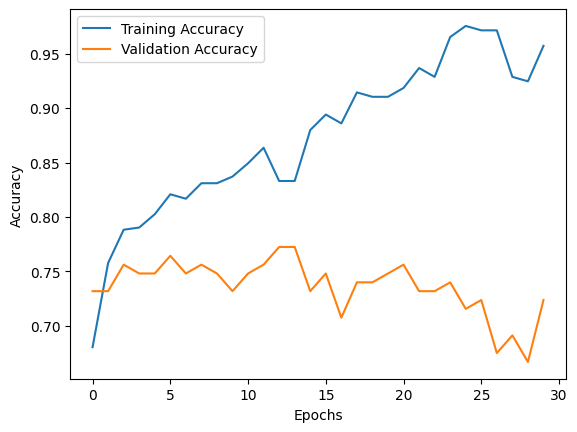

In [1]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("diabetes.csv")
data.head()

# Preprocessing the data
X = data.drop(columns="Outcome")  # Features
y = data["Outcome"]  # Target

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but useful for neural networks)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Define the neural network model
model = Sequential()

# Add layers to the model
model.add(layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(xtest, ytest)

# Print the results
print(f"The loss of the model is: {loss} and the accuracy is: {accuracy}")

# Optional: Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

